In [5]:
# We need to include the home directory in our path, so we can read in our own module.
import os
import sys
sys.path.append(os.path.join(".."))
import cv2
import numpy as np
from utils.imutils import jimshow
from utils.imutils import jimshow_channel
from pathlib import Path
import matplotlib.pyplot as plt

## Load image

In [8]:
DATA_DIR = Path("../../../CDS-VIS/img")
assert DATA_DIR.exists()
img_path = str(DATA_DIR / "trex.png")
image = cv2.imread(img_path)

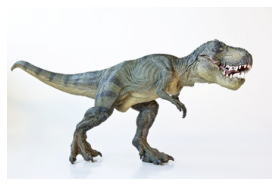

In [9]:
jimshow(image)

## Drawing

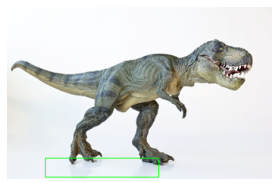

In [10]:
jimshow(cv2.rectangle(image, (50, 200), (200, 225), (0,255,0), 1))

In [11]:
(centerX, centerY) = (image.shape[1] // 2, image.shape[0] // 2)

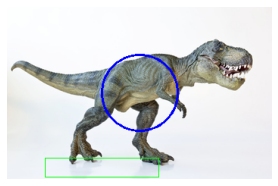

In [12]:
jimshow(cv2.circle(image, (centerX, centerY), 50, (255,0,0), 2))

## Creating and using masks

__Rectangle__

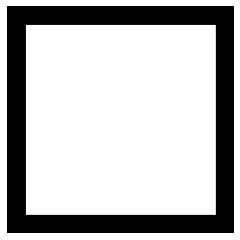

In [13]:
# Create a 300x300 array of zeros
rectangle = np.zeros((300, 300), dtype = "uint8")
# cv2.rectangle(image, start_point, end_point, thickness)
rec = cv2.rectangle(rectangle, (25, 25), (275, 275), 255, -1)
jimshow_channel(rec)

__Circle__

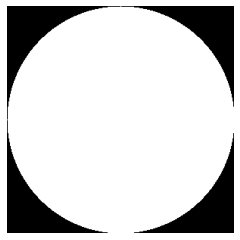

In [14]:
# cirlc
circle = np.zeros((300, 300), dtype = "uint8")
# cv2.circle(image, centre_coordinates, radius, color, thickness)
circ = cv2.circle(circle, (150, 150), 150, 255, -1)
jimshow_channel(circ)

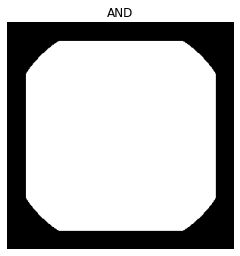

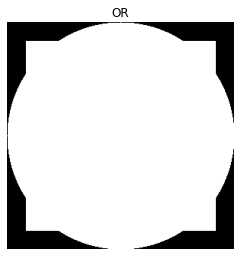

In [15]:
# AND
bitwiseAnd = cv2.bitwise_and(rectangle, circle)
jimshow_channel(bitwiseAnd, "AND")

# ORZ
bitwiseOR = cv2.bitwise_or(rectangle, circle)
jimshow_channel(bitwiseOR, "OR")

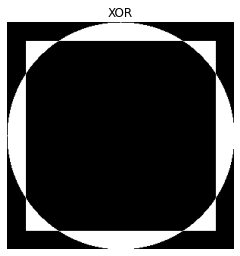

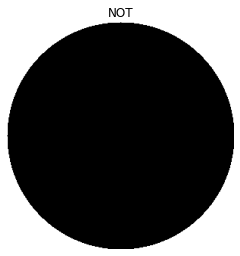

In [16]:
# XOR
bitwiseXOR = cv2.bitwise_xor(rec, circ)
jimshow_channel(bitwiseXOR, "XOR")

# NOT
bitwiseNOT = cv2.bitwise_not(circle)
jimshow_channel(bitwiseNOT, "NOT")

__Rectangle mask__

In [17]:
# Mask should be same shape as image
mask = np.zeros(image.shape[:2], dtype="uint8")

# find centres
(centre_x, centre_y) = (image.shape[1]//2, image.shape[0]//2)

In [18]:
cv2.rectangle(mask, (centre_x-50, centre_y-50), (centre_x+10, centre_y+10), 255, -1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

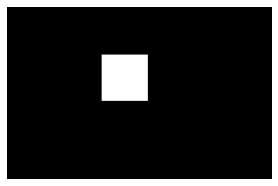

In [19]:
jimshow_channel(mask)

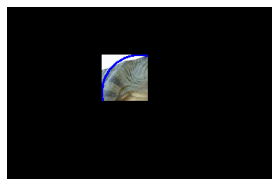

In [ ]:
jimshow(cv2.bitwise_and(image, image, mask = mask))

## GROUP WORK

__Circle mask__



We can perform a similar process using circular masks.

See if you can figure it out in small groups!

In [ ]:
# reload the image
image = cv2.imread(fname)

In [ ]:
# create mask 'image'
mask = np.zeros(image.shape[:2], dtype = "uint8")

In [ ]:
# create array of zeros
(centre_x, centre_y) = (image.shape[1]//2, image.shape[0]//2)

In [ ]:
# define centres
cv2.circle(mask, (centre_x, centre_y), 50, 255, -1)

In [ ]:

# bitwise AND on original image
jimshow(cv2.bitwise_and(image, image, mask = mask))

## Blurring and convolutions

__Averaging__

In [ ]:
blurred = np.hstack([
    cv2.blur(image, (3, 3)),
    cv2.blur(image, (5, 5)),
    cv2.blur(image, (7, 7))]
    )
jimshow(blurred)

__Gaussian__

Third parameter relates to variance around the mean for a Gaussian distribution.

No need to worry about that - we can set the value to 0, which means that sigma depends on the size of the kernel.

I.e. (image, (3,3), 0) sigma = 3; (image, (5,5), 0) sigma = 5; etc


In [ ]:
# gaussian, third parameter is \sigma = 0, then computed for kernel size
blurred = np.hstack([
    cv2.GaussianBlur(image, (3, 3), 0),
    cv2.GaussianBlur(image, (5, 5), 0),
    cv2.GaussianBlur(image, (7, 7), 0)]
    )
jimshow(blurred)

__Median__

In [ ]:
#does not "invent" pixel values, kernel removes details and noise
blurred = np.hstack([
    cv2.medianBlur(image, 3),
    cv2.medianBlur(image, 5),
    cv2.medianBlur(image, 7)]
    )
jimshow(blurred)

__Bilateral__

The first parameter we supply is the image we want to blur. 

Then, we need to define the diameter of our pixel neighborhood. 

The second argument is our color σ. A larger value for color σ means that more colors in the neighborhood will be considered when computing the blur. 

Finally, we need to supply the space σ. A larger value of space σ means that pixels farther out from the central pixel will influence the blurring calculation, pro- vided that their colors are similar enough

In [ ]:
# keeps edges via 2 gaussian, only smooth similar intensity, slow algo
blurred = np.hstack([
    cv2.bilateralFilter(image, 3, 21, 21),
    cv2.bilateralFilter(image, 7, 31, 31),
    cv2.bilateralFilter(image, 9, 41, 41)
])
jimshow(blurred)
# second argument: diameter of pixel neighborhood
# third argument: color \sigma (number of colors to consider)
# fourth argument: space \sigma (number of pixel to consider)

## Thresholding

__Simple__

Applications:
- preprocessing, focus on objects or areas of particular interest in an image
- segment foreground and background

In [ ]:
image = cv2.imread("../data/img/trex.png")

In [ ]:
# convert to greyscale
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
# plot histogram
plt.hist(image.flatten(),256,[0,256])
plt.show()

In [ ]:
# remove high frequency edges with a blur kernel
blurred = cv2.GaussianBlur(image, (5, 5), 0)
jimshow_channel(image)

In [ ]:
# threshold 
(T, thres) = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY)
jimshow_channel(thres)

In [ ]:

(T, thresInv) = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY_INV)
jimshow_channel(thresInv)

In [ ]:
jimshow_channel(cv2.bitwise_and(image, image, mask = thresInv))

__Adaptive__

Exemplify adaptive thresholding to avoid one threshold value that is manually determined
- considers small neighbors of pixels and then finds an optimal threshold value T for each neighbo

In [ ]:
image = cv2.imread("../data/img/trex.png")

In [ ]:
# preprocessing
image_grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(image_grey, (5,5), 0)

__Adaptive mean threshold__

In [ ]:
am_thresh = cv2.adaptiveThreshold(blurred, 255, 
    cv2.ADAPTIVE_THRESH_MEAN_C,# method for computing threshold (mean of neighborhood) 
    cv2.THRESH_BINARY_INV,# method fo thresholding 
    11,# neighborhood pixel size
    4 # parameter C subtracted from the mean to fine-tune thresholding
    )
jimshow_channel(am_thresh)

In [ ]:
jimshow_channel(cv2.bitwise_and(image_grey, image_grey, mask = am_thresh))

__Adaptive Gaussian threshold__

In [ ]:
ag_thresh = cv2.adaptiveThreshold(blurred, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV,
    11,
    3
    )
jimshow_channel(ag_thresh)

In [ ]:
jimshow_channel(cv2.bitwise_and(image_grey, image_grey, mask = ag_thresh))

__Install mahotas__

In [ ]:
!python -m pip install mahotas

In [ ]:
# Otsu
T = mahotas.thresholding.otsu(blurred)
print("[INFO] Otsu's threshold {}".format(T))

In [ ]:
otsu_thresh = image_grey.copy()
otsu_thresh[otsu_thresh > T] = 255
otsu_thresh[otsu_thresh < 255] = 0
otsu_thresh = cv2.bitwise_not(otsu_thresh)

In [ ]:
jimshow_channel(otsu_thresh)

In [ ]:
jimshow_channel(cv2.bitwise_and(image_grey, image_grey, mask = otsu_thresh))